In [1]:
import os
os.getcwd()


'C:\\Users\\micha\\Ecommerce Linear Regression'

In [2]:
!pip install pandas matplotlib seaborn


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("Ecommerce Customers.csv")

In [5]:
df.head()


,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
df.describe()


,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


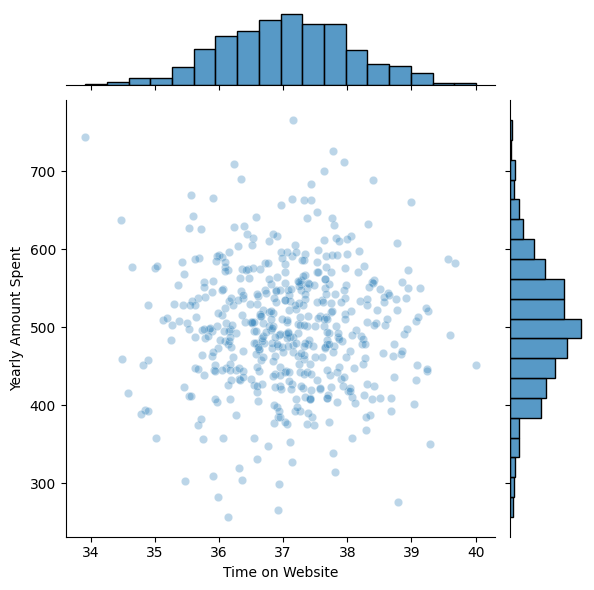

In [8]:
# EDA
sns.jointplot(x="Time on Website", y="Yearly Amount Spent", data =df, alpha=0.3)


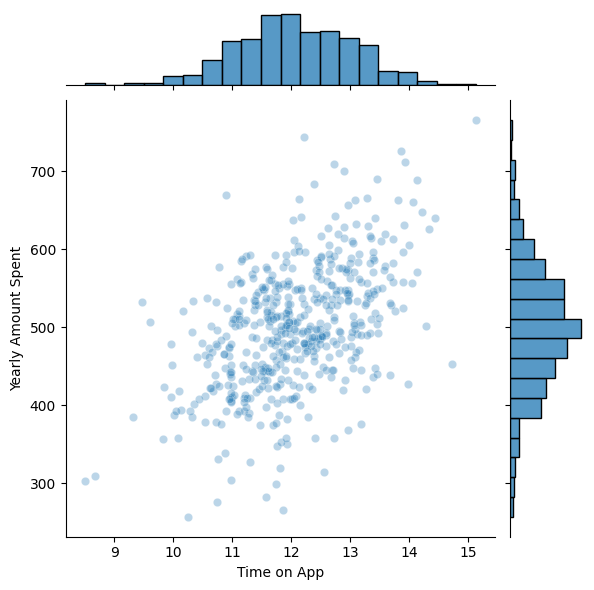

In [9]:
# EDA
sns.jointplot(x="Time on App", y="Yearly Amount Spent", data =df, alpha=0.3)


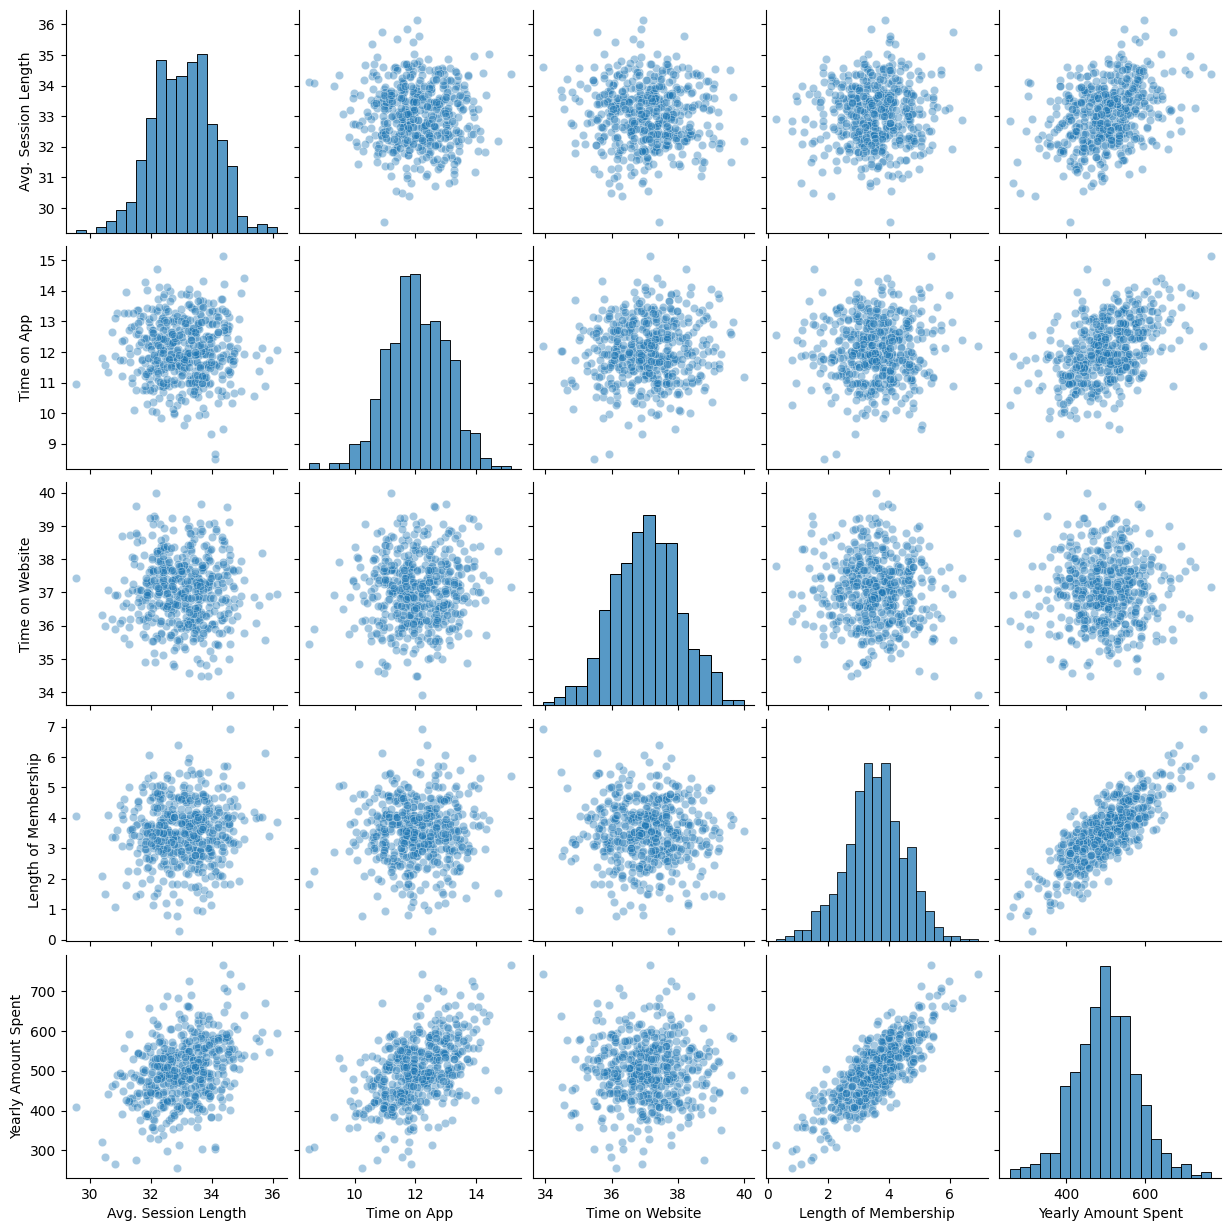

In [10]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']), plot_kws={'alpha': 0.4})


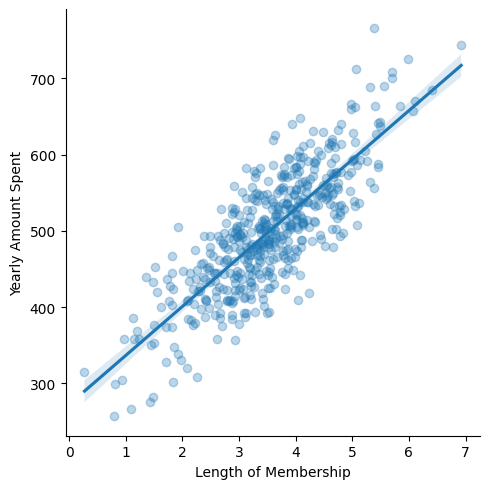

In [11]:
sns.lmplot(x ='Length of Membership', 
           y = 'Yearly Amount Spent',
           data = df,
           scatter_kws={'alpha' :0.3})
    

In [12]:
!pip install scikit-learn

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y = df['Yearly Amount Spent']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
X_test

,Avg. Session Length,Time on App,Time on Website,Length of Membership
361,32.077590,10.347877,39.045156,3.434560
73,32.808698,12.817113,37.031539,3.851579
374,31.447446,10.101632,38.043453,4.238296
155,32.449522,13.457725,37.238806,2.941411
104,31.389585,10.994224,38.074452,3.428860
...,...,...,...,...
266,34.555283,11.777772,37.979827,3.784273
23,32.903251,11.657576,36.772604,3.919302
222,34.334865,11.109456,38.585855,3.892891
261,32.550527,13.041245,36.655208,3.456234


In [17]:
y_test

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
          ...    
266    554.003093
23     519.340989
222    502.409785
261    514.009818
426    530.766719
Name: Yearly Amount Spent, Length: 150, dtype: float64

In [18]:
y_train

5      637.102448
116    479.231093
45     549.860590
16     457.847696
462    397.420584
          ...    
106    494.551861
270    540.995739
348    392.810345
435    571.216005
102    420.737673
Name: Yearly Amount Spent, Length: 350, dtype: float64

In [19]:
# Training the Model

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lm = LinearRegression()

In [22]:
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
lm.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [24]:
cdf = pd.DataFrame(lm.coef_, X.columns, columns =['Coef'])
print(cdf)

                           Coef
Avg. Session Length   25.724256
Time on App           38.597135
Time on Website        0.459148
Length of Membership  61.674732


In [25]:
# Predictions

In [26]:
predictions = lm.predict(X_test)

In [27]:
predictions

array([403.66993069, 542.57756289, 427.06591658, 502.02460425,
       410.12143559, 569.93442508, 531.93431341, 506.29650969,
       408.71870658, 473.97737105, 441.46912726, 425.33703059,
       425.1297229 , 527.61676714, 431.45684016, 424.0769184 ,
       575.76543296, 484.89856554, 458.35936863, 481.96502182,
       502.32441491, 513.63783554, 507.58877002, 646.57464283,
       450.24372141, 496.27043415, 556.40457807, 554.95630839,
       399.64237199, 325.84623136, 532.89783259, 478.12238702,
       501.05701845, 305.97335848, 505.77244448, 483.79591969,
       518.8331528 , 438.18241857, 456.71094234, 471.04609461,
       494.44008972, 445.31155755, 508.78802753, 501.04594193,
       488.83499673, 535.38079541, 595.20129802, 514.04714872,
       280.76758312, 433.10112367, 421.70823427, 481.23640152,
       584.71372272, 608.7748096 , 563.98513427, 494.72804869,
       394.52133407, 456.4197529 , 573.08767515, 499.6984241 ,
       512.83277025, 392.12434043, 480.05057697, 481.54

Text(0.5, 1.0, 'Evaluation of our LM model')

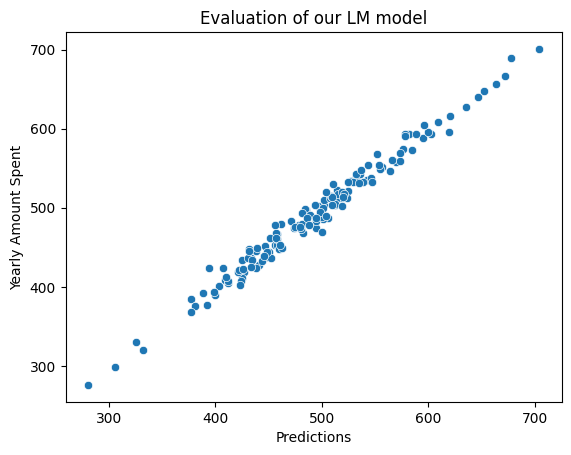

In [28]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation of our LM model")

In [29]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [30]:
import math

In [31]:
print("Mean Absolute Error: ",mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ",mean_squared_error(y_test, predictions))
print("RMSE: ",math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  8.426091641432116
Mean Squared Error:  103.91554136503333
RMSE:  10.193897260863155


In [32]:
# residuals

In [36]:
residuals = y_test - predictions

In [37]:
residuals

361    -2.636795
73     -7.800375
374    -8.463174
155     1.953775
104    -0.051825
         ...    
266    10.327176
23     15.027984
222   -16.778237
261    -6.021734
426    -4.371832
Name: Yearly Amount Spent, Length: 150, dtype: float64

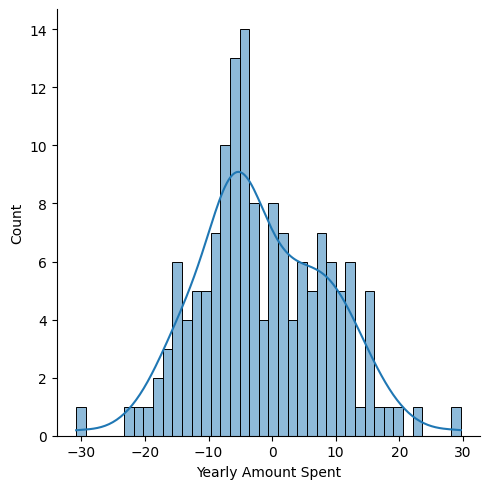

In [46]:
sns.displot(residuals, bins=40, kde=True)

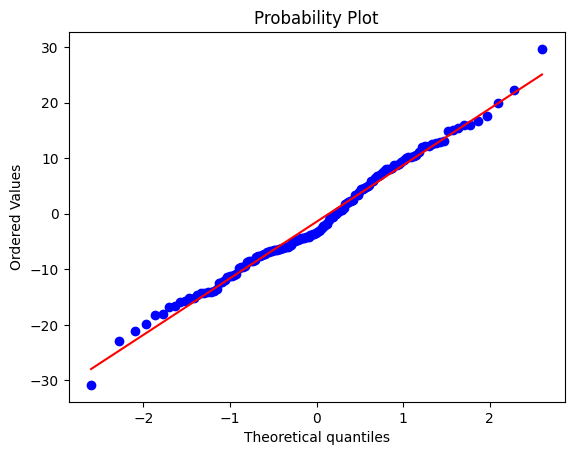

In [49]:
import pylab 
import scipy.stats as stats

stats.probplot(residuals, dist="norm", plot=pylab)
pylab.show()